In [13]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow.keras
from sklearn import datasets
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

In [14]:
np.random.seed(0)

In [15]:
n_pts = 500
X,y = datasets.make_circles(n_samples=n_pts, random_state = 123,noise=0.1, factor = 0.2) # X-> datapoints, y-> labels

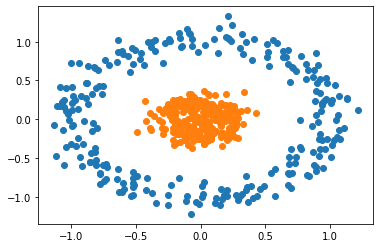

In [16]:
plt.scatter(X[y==0, 0],X[y==0,1])
plt.scatter(X[y==1, 0],X[y==1,1])

In [17]:
model  = Sequential()
model.add(Dense(4,input_shape=(2,),activation='sigmoid'))
model.add(Dense(1,activation = 'sigmoid')) # input call not required as it has already been defined
model.compile(Adam(learning_rate=0.01),'binary_crossentropy',metrics = ['accuracy'])

In [18]:
h = model.fit(x=X,y=y,verbose = 1, batch_size=20, epochs=100,shuffle='true')

Epoch 1/100
25/25 [==============================] - 1s 2ms/step - loss: 0.6943 - accuracy: 0.4700
Epoch 2/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6942 - accuracy: 0.6100
Epoch 3/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6935 - accuracy: 0.5840
Epoch 4/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6933 - accuracy: 0.6120
Epoch 5/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6930 - accuracy: 0.5880
Epoch 6/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6932 - accuracy: 0.3680
Epoch 7/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6924 - accuracy: 0.6180
Epoch 8/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6916 - accuracy: 0.6220
Epoch 9/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6905 - accuracy: 0.5860
Epoch 10/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6894 - accuracy: 0.5660
Epoch 11/

Text(0.5, 1.0, 'accuracy')

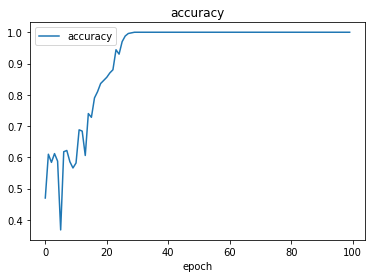

In [19]:
plt.plot(h.history['accuracy'])
plt.xlabel('epoch')
plt.legend(['accuracy'])
plt.title('accuracy')

Text(0.5, 1.0, 'loss')

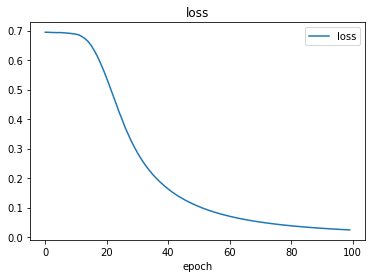

In [20]:
plt.plot(h.history['loss'])
plt.xlabel('epoch')
plt.legend(['loss'])
plt.title('loss')

In [22]:
def plot_decision_boundary(X,Y,model):
  x_span = np.linspace(min(X[:,0]) -0.25 ,max(X[:,0]) + 0.25, 50)
  y_span = np.linspace(min(X[:,1]) -0.25,max(X[:,1]) + 0.25, 50)
  xx, yy = np.meshgrid(x_span,y_span)
  xx_, yy_ = xx.ravel(), yy.ravel()
  grid = np.c_[xx_,yy_]
  pred_func = model.predict(grid)
  z = pred_func.reshape(xx.shape)
  plt.contourf(xx,yy,z)

79/79 [==============================] - 0s 2ms/step


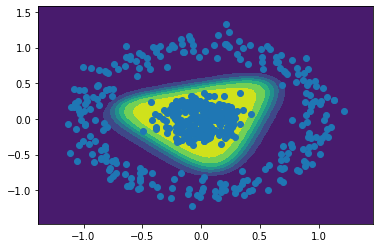

In [24]:
plot_decision_boundary(X,y,model)
plt.scatter(X[:n_pts,0], X[:n_pts,1])
plt.scatter(X[n_pts:,0], X[n_pts:,1])

1/1 [==============================] - 0s 30ms/step


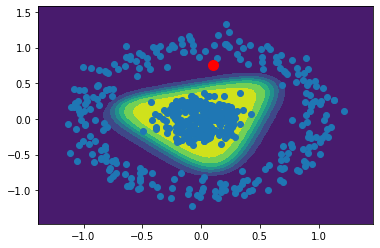

In [26]:
plot_decision_boundary(X,y,model)
plt.scatter(X[:n_pts,0], X[:n_pts,1])
plt.scatter(X[n_pts:,0], X[n_pts:,1])
x = 0.1
y = 0.75
point = np.array([[x,y]])
prediction = model.predict(point)
plt.plot([x],[y],marker = 'o',markersize = 10, color = 'red')
print("Prediction is:")